In [11]:
#plt96で様々なイオンで実行できるように一般化
import pandas as pd
import matplotlib.pyplot as plt
import decimal
import matplotlib.backends.backend_pdf

#イオン名と原子番号紐づけ(トリチウムはまだ含まず)
ion_dir={1:"h", 2:"he", 3:"li", 4:"be", 6:"c", 7:"n", 8:"o", 10:"ne", 14:"si",}

#取り出すイオン入力
I=ion_dir[10]   #ex I=ion_dir[4]
file=('plt96_%s_mod.dat' %I)

f=open(file)
line=f.readline()
line=line[6:]
dens=int(line[:2])   #密度
ev=int(line[3:5])   #電子温度
coff=int(line[6:])   #係数の数

df=pd.read_csv(file,header=1,delim_whitespace=True)

In [12]:
len(df['dens'].unique())

24

In [13]:
print(dens)
print(ev)
print(coff)

24
30
10


In [14]:
df

,dens,coff,-0.6988,-0.5227,-0.3008,-0.1547,0.0002,0.1763,0.3012,0.4773,...,2.6992,2.8453,3.0002,3.1763,3.3012,3.4773,3.6992,3.8453,4.0002,4.1763
0,7.699,1,-61.6396,-47.7904,-40.3361,-36.0570,-33.0180,-30.5594,-29.3254,-28.0661,...,-25.5370,-25.5170,-25.4955,-25.4704,-25.4524,-25.4265,-25.3932,-25.3710,-25.3471,-25.3196
1,7.699,2,-74.0000,-64.0404,-48.2054,-41.6247,-36.6733,-32.8352,-30.8999,-28.9595,...,-25.4329,-25.4614,-25.4926,-25.5280,-25.5531,-25.5885,-25.6331,-25.6624,-25.6934,-25.7287
2,7.699,3,-32.5941,-31.3063,-29.7118,-28.9221,-28.3427,-27.8781,-27.6395,-27.3651,...,-24.9990,-25.0219,-25.0464,-25.0728,-25.0931,-25.1223,-25.1591,-25.1834,-25.2091,-25.2383
3,7.699,4,-34.5476,-33.3085,-31.5633,-30.2631,-28.9202,-27.9119,-27.4449,-27.0119,...,-25.0119,-25.0309,-25.0563,-25.0887,-25.1129,-25.1484,-25.1945,-25.2249,-25.2571,-25.2937
4,7.699,5,-36.4055,-34.8879,-32.9763,-31.7182,-30.3872,-28.9569,-28.2276,-27.4501,...,-24.9580,-24.9741,-24.9957,-25.0225,-25.0430,-25.0730,-25.1113,-25.1367,-25.1638,-25.1945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,15.301,6,-41.6255,-39.5006,-36.8129,-35.0355,-33.1452,-30.9888,-29.5017,-27.9609,...,-24.9330,-24.9487,-24.9708,-25.0076,-25.0365,-25.0808,-25.1392,-25.1778,-25.2195,-25.2669
236,15.301,7,-40.9100,-38.9767,-36.5407,-34.9359,-33.2346,-31.3010,-29.9315,-28.1351,...,-25.0241,-25.0428,-25.0706,-25.1101,-25.1418,-25.1901,-25.2571,-25.3036,-25.3537,-25.4100
237,15.301,8,-32.7207,-31.8750,-30.8095,-30.1077,-29.3638,-28.5181,-27.9180,-27.0731,...,-25.2737,-25.2930,-25.3198,-25.3584,-25.3903,-25.4388,-25.5034,-25.5459,-25.5926,-25.6454
238,15.301,9,-72.9658,-74.0000,-74.0000,-74.0000,-74.0000,-74.0000,-74.0000,-74.0000,...,-26.3230,-26.1318,-25.9963,-25.8971,-25.8543,-25.8150,-25.7978,-25.7972,-25.8082,-25.8278


In [15]:
x=list(df.columns[2:])
x=[float(s) for s in x]

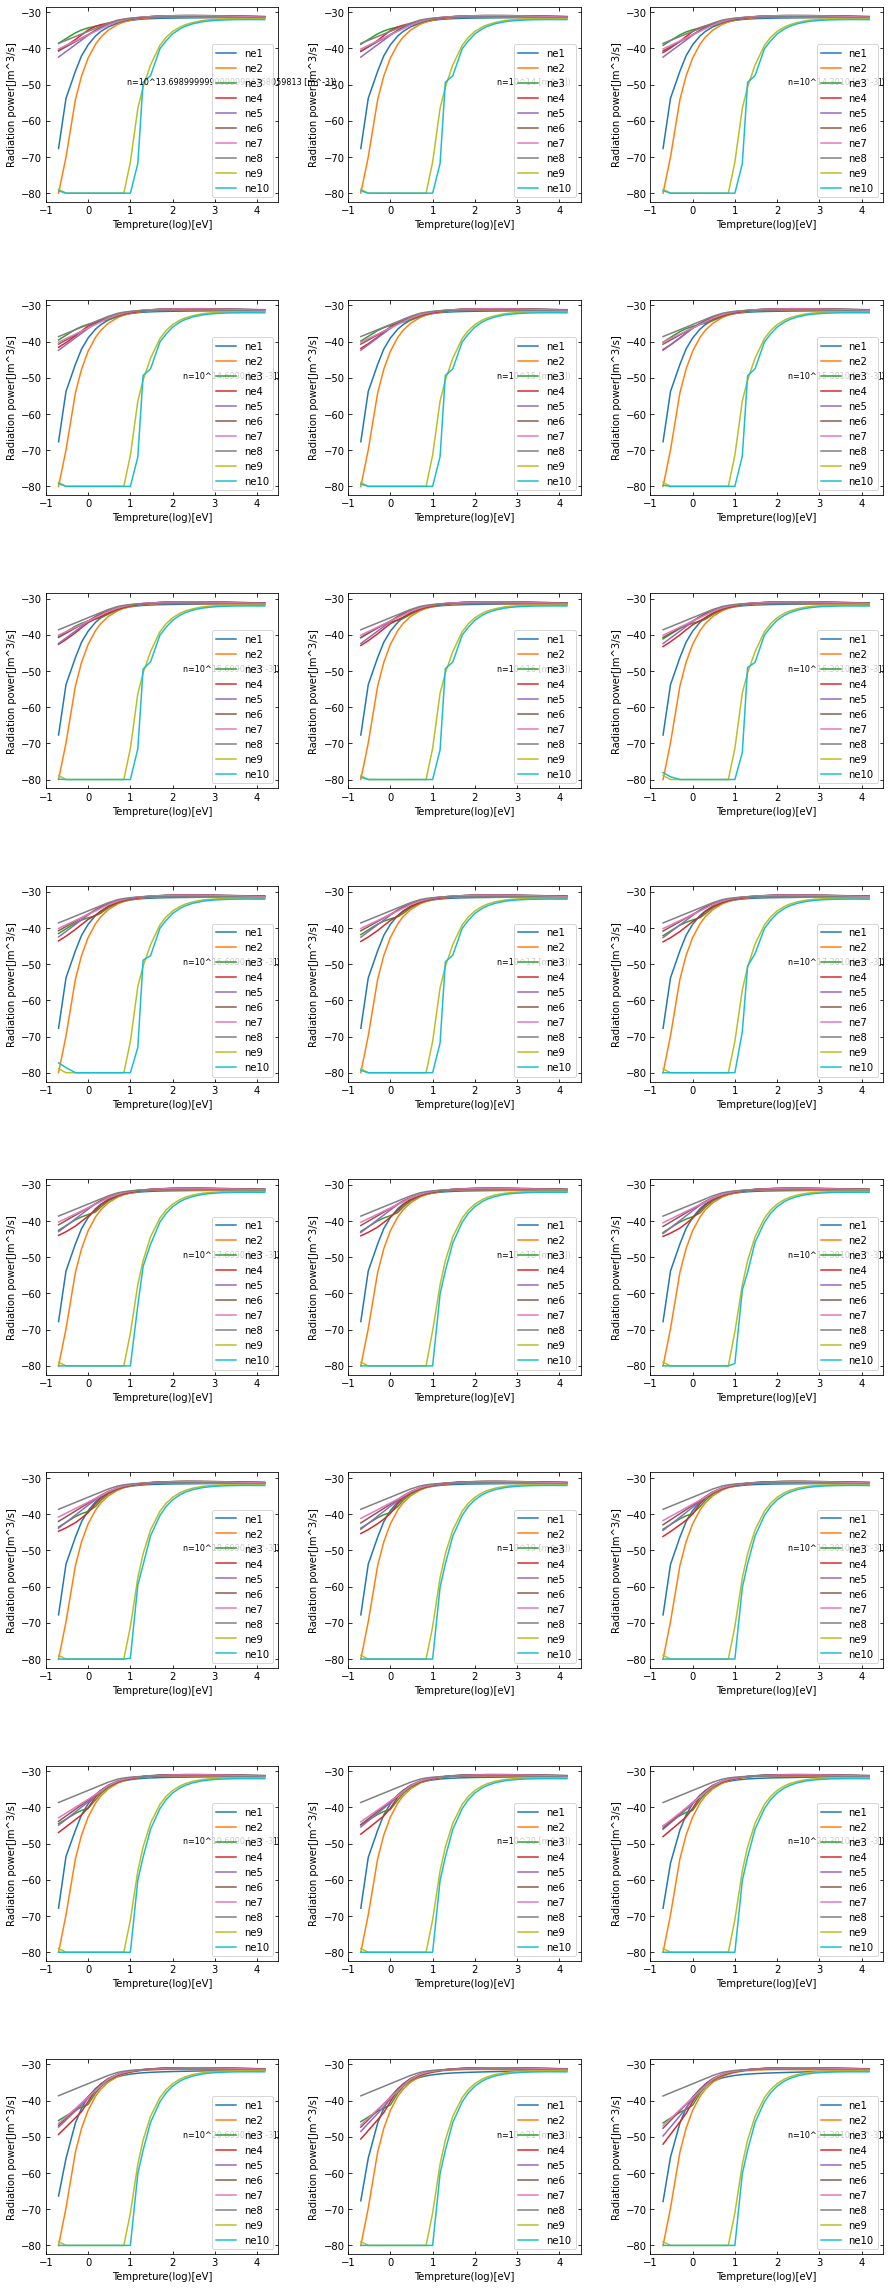

In [16]:
df_group=df.groupby('dens')
n=1   #グラフレイアウトの場所番号
w=15   #グラフ画像の幅
h=(len(df['dens'].unique())/3)*20   #高さ
fig=plt.figure(figsize=(w,h))
for d in df['dens'].unique():      
    ax=fig.add_subplot(30,3,n)
    ax.set_xlim(-1,4.5)
    ax.set_xlabel('Tempreture(log)[eV]')
    ax.set_ylabel('Radiation power[Jm^3/s]')
    plot_memo=('n=10^%s [m^-3])' %(decimal.Decimal(d)+decimal.Decimal(6)))
    ax.annotate(plot_memo, xy=(0.8, 0.6), fontsize=8, xycoords='axes fraction', horizontalalignment='center')
    ax.tick_params(direction='in' , bottom=True ,top=True ,left=True ,right=True)
    decimal.getcontext().prec = 6
    #title=('n=10^%s [m^-3])' %(decimal.Decimal(d)+decimal.Decimal(6)))
    #ax.set_title(title ,y=-0.25)

    
    y_dir={}
    for i in range(coff):
        y=df_group.get_group(d)[i:i+1].values[0][2:]
        decimal.getcontext().prec = 6
        y=[decimal.Decimal(s)-decimal.Decimal(6) for s in y]   #単位をm^3に
        y_dir[i]=y
        label=('%s%s' %(I,(i+1)))
        ax.plot(x,y_dir[i],label=label)
    ax.legend(loc=0)
    n += 1
fig.subplots_adjust(wspace=0.3, hspace=0.5) # グラフ間の隙間調整
plt.show()